In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# initialize the camera 
# If you have multiple camera connected with  
# current device, assign a value in cam_port  
# variable according to that 
#cam_port = 1
cam = cv.VideoCapture(-1) 

In [93]:
images = []

In [96]:
result,image = cam.read()
images.append(np.array(image))

In [39]:
result, image = cam.read() 
img1 = np.array(image)

In [46]:
result, image = cam.read() 
img2 = np.array(image)

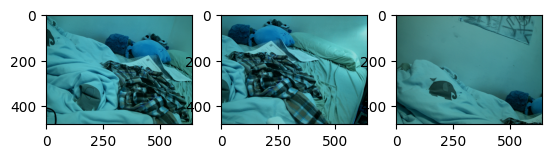

In [101]:
fig,axs = plt.subplots(1,len(images))
for i in range(len(axs)):
    axs[i].imshow(images[i])


In [111]:
def find_matches(bfm,des1,des2):
    matches = bfm.knnMatch(des1,des2,k=2)
    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.6*n.distance:
            good.append([m])
    return good

def match_to_arr(match):
    l = len(match)
    q_ids = np.array([match[i][0].queryIdx for i in range(l)])
    t_ids = np.array([match[i][0].trainIdx for i in range(l)])
    return np.vstack((q_ids,t_ids))

In [ ]:
def find_matches(bfm,descriptors):
    matches = find_matches(bfm,descriptors[0],descriptors[1])

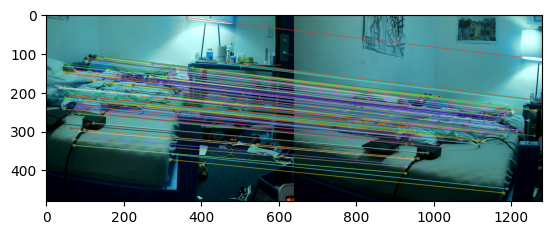

(<matplotlib.image.AxesImage at 0x79fdcc0a5690>, None)

In [106]:

# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1,des1 = sift.detectAndCompute(img1,None)
kp2,des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
good = find_matches(bf,des1,des2)

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()


    item.distance: This attribute gives us the distance between the descriptors. A lower distance indicates a better match.
    item.trainIdx: This attribute gives us the index of the descriptor in the list of train descriptors (in our case, it’s the list of descriptors in the img2).
    item.queryIdx: This attribute gives us the index of the descriptor in the list of query descriptors (in our case, it’s the list of descriptors in the img1).
    item.imgIdx: This attribute gives us the index of the train image.


In [115]:
match_to_arr(good).T

array([[  0, 144],
       [  5, 172],
       [ 11, 177],
       [ 12, 181],
       [ 14, 201],
       [ 15, 205],
       [ 18, 215],
       [ 19, 225],
       [ 21, 226],
       [ 22, 230],
       [ 23, 231],
       [ 27, 251],
       [ 28, 240],
       [ 31, 242],
       [ 33, 259],
       [ 34, 238],
       [ 36, 263],
       [ 37, 261],
       [ 38, 262],
       [ 39, 269],
       [ 41, 265],
       [ 42, 267],
       [ 43, 274],
       [ 53, 285],
       [ 56, 291],
       [ 57, 302],
       [ 59, 305],
       [ 60, 301],
       [ 65, 308],
       [ 66, 303],
       [ 67, 300],
       [ 68, 309],
       [ 70, 311],
       [ 71, 310],
       [ 77, 319],
       [ 79, 320],
       [ 80, 318],
       [ 81, 315],
       [ 82, 316],
       [ 83, 317],
       [ 84, 323],
       [ 85, 321],
       [ 87, 327],
       [ 88, 329],
       [ 89, 331],
       [ 98, 342],
       [ 99, 338],
       [100, 339],
       [107, 348],
       [110, 350],
       [111, 356],
       [113, 354],
       [114,

In [ ]:
# If image will detected without any error,  
# show result 
if result: 
    
    # showing result, it take frame name and image  
    # output 
    cv.imshow("GeeksForGeeks", image) 
  
    # saving image in local storage 
    cv.imwrite("GeeksForGeeks.png", image) 
  
    # If keyboard interrupt occurs, destroy image  
    # window 
    cv.waitKey(0) 
    cv.destroyWindow("GeeksForGeeks") 
  
# If captured image is corrupted, moving to else part 
else: 
    print("No image detected. Please! try again") 